# Simple Linear Regression

## Importing the libraries

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Importing the dataset

In [4]:
#Load the dataset
df = pd.read_csv('house_price_data.csv')

#Look at the first 5 rows
df.head()

,SqFt Area,Price (INR in Lakhs)
0,650,30.2
1,620,29.0
2,1530,95.0
3,1500,93.0
4,1300,78.0


## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split

# Assuming 'Price' is the column you're trying to predict.
# Replace 'Price' with the actual name if it's different.
X = df.drop('Price (INR in Lakhs)', axis=1)
y = df['Price (INR in Lakhs)']

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (40, 1)
X_test shape: (10, 1)
y_train shape: (40,)
y_test shape: (10,)


## Training the Simple Linear Regression model on the Training set

In [9]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Show first 5 predictions
print("Predicted prices:\n", y_pred[:5])

Predicted prices:
 [ 22.3610957   55.66330057  20.14094871 101.54633839  26.06134068]


#Evaluate  the Test set results

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# R-squared Score
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Squared Error (MSE): 3.10366102104543
Root Mean Squared Error (RMSE): 1.76172103950808
R² Score: 0.9967755541390029


## Visualising the Training set results

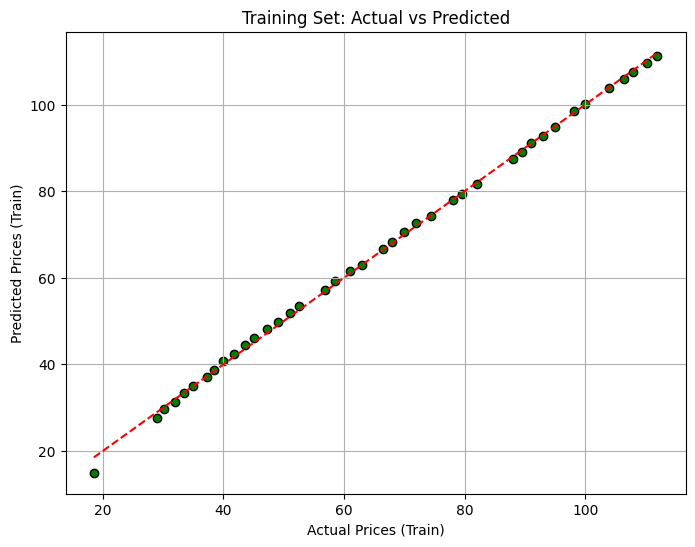

In [11]:
# Predicting on training data
y_train_pred = model.predict(X_train)

# Plot actual vs predicted (training data)
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='green', edgecolor='black')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.xlabel("Actual Prices (Train)")
plt.ylabel("Predicted Prices (Train)")
plt.title("Training Set: Actual vs Predicted")
plt.grid(True)
plt.show()

## Visualising the Test set results

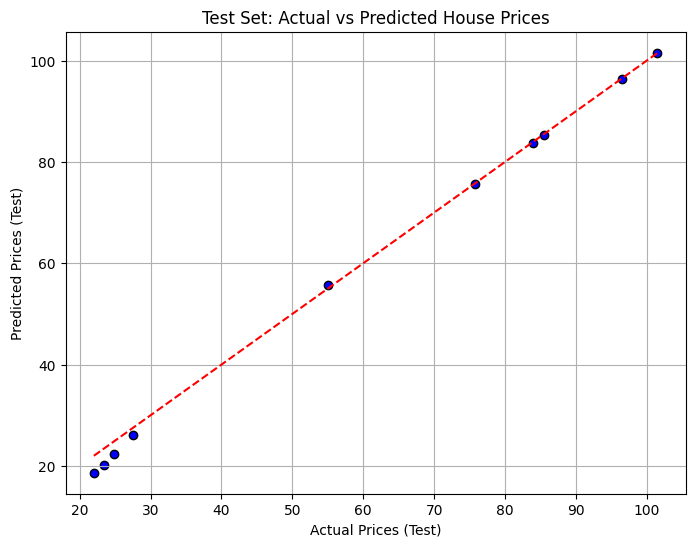

In [12]:
# Visualizing actual vs predicted prices on the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Prices (Test)")
plt.ylabel("Predicted Prices (Test)")
plt.title("Test Set: Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

## Let's predict

In [13]:
# Add predicted prices to the existing X_test DataFrame
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Actual Price'] = y_test.values
X_test_with_predictions['Predicted Price'] = y_pred

# Show the first few rows
X_test_with_predictions.head(10)


,SqFt Area,Actual Price,Predicted Price
13,550,24.8,22.361096
39,1000,55.0,55.663301
30,520,23.5,20.140949
45,1620,101.5,101.546338
17,600,27.5,26.061341
48,1380,84.0,83.785162
26,1400,85.5,85.265260
25,1270,75.8,75.644623
32,1550,96.5,96.365995
19,500,22.0,18.660851
